In [41]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from ocean_navigation_simulator.utils.plotting_utils import set_palatino_font
set_palatino_font("ocean_navigation_simulator/package_data/font/Palatino_thin.ttf")


In [42]:
# Region 1
config = {}
config["x_range"] = [-160, -105]
config["y_range"] = [15, 40]
df = pd.read_csv("data/results/safety_floating_10k_90d.csv")
# Create 2d histogram of # stranding / # all in each 1 degree by 1 degree bin
x_edges = np.arange(config["x_range"][0], config["x_range"][1]+1, 1)
y_edges = np.arange(config["y_range"][0], config["y_range"][1]+1, 1)

In [38]:
# Hawaii
config = {}
config["x_range"] = [-159, -154]
config["y_range"] = [18.2, 22.2]
df = pd.read_csv("data/results/safety_floating_10k_10d_hawaii.csv")
# Create 2d histogram of # stranding / # all in each 1 degree by 1 degree bin
x_edges = np.arange(config["x_range"][0], config["x_range"][1]+1, 0.3333)
y_edges = np.arange(config["y_range"][0], config["y_range"][1]+1, 0.3333)

In [43]:
H_s, xedges, yedges = np.histogram2d(df[df["termination_reason"]=="Stranded"]["x_0_lon"], df[df["termination_reason"]=="Stranded"]["x_0_lat"], bins=(x_edges, y_edges))
H_o, xedges_o, yedges_o = np.histogram2d(df[df["termination_reason"]!="Stranded"]["x_0_lon"], df[df["termination_reason"]!="Stranded"]["x_0_lat"], bins=(x_edges, y_edges))
H = H_s / (H_s + H_o)
# Transpose due to axis order
H = H.T

/tmp/ipykernel_28698/51849888.py:3: RuntimeWarning: invalid value encountered in true_divide
  H = H_s / (H_s + H_o)


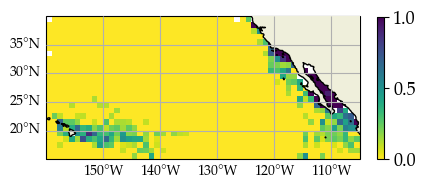

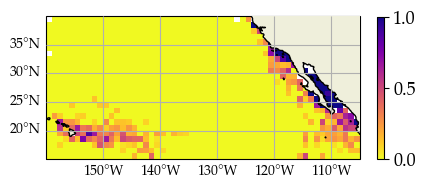

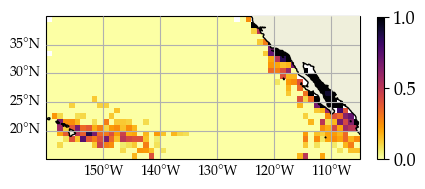

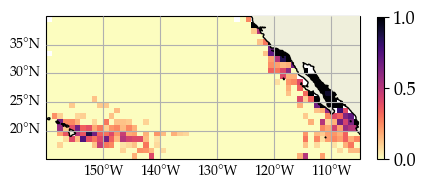

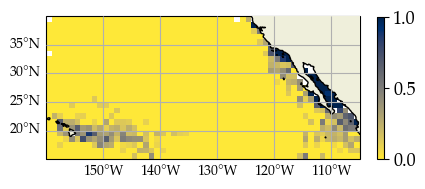

In [47]:
# colors = [(0, 0.5, 0), (1, 0, 0)] # first color is black, last is red
# cm = LinearSegmentedColormap.from_list(
#         "Custom", colors, N=20)
# mat = np.indices((100,100))[1]
#plot_color_gradients = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
#for cm in plot_color_gradients:

fig = plt.figure()#figsize=(10, 10)) # Not having a fig size helps with the layout
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=3, edgecolor="black")
if config["y_range"][0] == 15:
        grid_lines = ax.gridlines(draw_labels=True, zorder=5)
else:
        grid_lines = ax.gridlines(draw_labels=False, zorder=5)

grid_lines.top_labels = False
grid_lines.right_labels = False

ax.axis(xmin=config["x_range"][0], xmax=config["x_range"][1])
ax.axis(ymin=config["y_range"][0], ymax=config["y_range"][1])

X, Y = np.meshgrid(xedges, yedges)
im = plt.pcolormesh(X, Y, H, alpha = 1, cmap="plasma") #"RdYlGn_r""viridis")

#cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])

# Add a colorbar
# If whole region 1
if config["y_range"][0] == 15:
        cbar = plt.colorbar(im, ax=ax, fraction=0.021)
else: 
        cbar = plt.colorbar(im, ax=ax, fraction=0.0366)


#ax.text(0.5, -0.1, 'Longitude', ha='center', va='center', transform=ax.transAxes)
#ax.text(-0.1, 0.5, 'Latitude', ha='center', va='center', transform=ax.transAxes, rotation='vertical')
fig.tight_layout()
if config["y_range"][0] == 15:
        save_name = "generated_media/paper/stranding_region1_90_days"
else:
        save_name = "generated_media/paper/stranding_hawaii"

fig.savefig(save_name  +".png", dpi=600, bbox_inches='tight')
fig.tight_layout()
fig.savefig(save_name + ".pdf", bbox_inches='tight')
